# Travel Demand Forecasting using various ML techniques

### K BHAVISH RAJU   -   PES1UG22AM078
### MOHAMMED SAQLAIN   -   PES1UG22AM095
### TEJAS V BHAT   -   PES1UG22AM909
### AYUSH M   -   PES1UG22AM912

# Chicago Divvy Bicycle Sharing Data

# Feature Description:

<b>trip_id</b>ID attached to each trip taken
<br><b>year</b> Year
<br><b>month</b> Month
<br><b>week</b> Week No.
<br><b>day</b> Day
<br><b>hour</b> Hour
<br><b>usertype</b> "Customer" is a rider who purchased a 24-Hour Pass; "Subscriber" is a rider who purchased an Annual Membership
<br><b>gender</b>
<br><b>starttimeday</b> and time trip started, in CST
<br><b>stoptimeday</b> and time trip ended, in CST
<br><b>tripdurationtime</b> of trip in minutes
<br><b>temperature</b>
<br><b>events</b>
<br><b>from_station_idID</b> of station where trip originated
<br><b>from_station_namename</b> of station where trip terminated
<br><b>latitude_startstation</b> latitude
<br><b>longitude_startstation</b> longitude
<br><b>dpcapacity_startnumber</b> of total docks at each station
<br><b>to_station_id</b>
<br><b>to_station_name</b>
<br><b>latitude_end</b>
<br><b>longitude_end</b>
<br><b>dpcapacity_endnumber</b> of total docks at each station

### Importing all the important libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection  import validation_curve
from sklearn.model_selection  import learning_curve
from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection   import cross_val_score

from sklearn import linear_model
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore')

### Loading dataset

In [4]:
#Loading dataset
path = "/kaggle/input/data.csv"
df = pd.read_csv(path)
data = df

df.shape

(9495235, 23)

# EXPLORATORY DATA ANALYSIS

In [5]:
data.isnull().sum(0)

trip_id              0
year                 0
month                0
week                 0
day                  0
hour                 0
usertype             0
gender               0
starttime            0
stoptime             0
tripduration         0
temperature          0
events               0
from_station_id      0
from_station_name    0
latitude_start       0
longitude_start      0
dpcapacity_start     0
to_station_id        0
to_station_name      0
latitude_end         0
longitude_end        0
dpcapacity_end       0
dtype: int64

### Defining Holidays and color gradients for plots

In [6]:
#Holidays
holidays = [
'2014-01-01','2014-12-25',
'2014-11-11','2014-07-04',
'2014-01-20','2014-02-17',
'2014-03-02','2014-05-26',
'2014-09-01','2014-10-13',
'2014-11-27','2015-01-01',
'2015-12-25','2015-11-11',
'2015-07-04','2015-01-19',
'2015-02-16','2015-03-02',
'2015-05-25','2015-09-07',
'2015-10-12','2015-11-26',
'2016-01-01','2016-12-25',
'2016-11-11','2016-07-04',
'2016-01-18','2016-02-15',
'2016-03-04','2016-05-30',
'2016-09-05','2016-10-10',
'2016-11-24','2017-01-01',
'2017-12-25','2017-11-11',
'2017-07-04','2017-01-16',
'2017-02-20','2017-03-06',
'2017-05-29','2017-09-04',
'2017-10-09','2017-11-23'
]


COLORS = ['#F8BBD0', '#90CAF9', '#A5D6A7', '#FFEB3B']

def colorGradient(c1: str, c2: str, n: int):
    c1=np.array(matplotlib.colors.to_rgb(c1))
    c2=np.array(matplotlib.colors.to_rgb(c2))
    return [matplotlib.colors.to_hex((1-(i/n))*c1 + (i/n)*c2) for i in range(n)]

#### Adding columns like 'Holiday', 'Weekend', etc for better analysis

In [7]:
data['Weekend'] = np.where(data.day > 4 , 1, 0)
data['Holiday'] = data['starttime'].apply(lambda x: 1*any([k in x for k in holidays]))
data['temperature'] = (data['temperature'] - 32)*5/9

q1 = df['tripduration'].quantile(.25)
q3 = df['tripduration'].quantile(.75)
iqr = q3 - q1
fltr = (data['tripduration'] >= q1 - 1.5*iqr) & (data['tripduration'] <= q3 + 1.5*iqr)
data = data.loc[fltr]  

#### Plots and analysis

#### Lets look at the gender diversity in bike rides

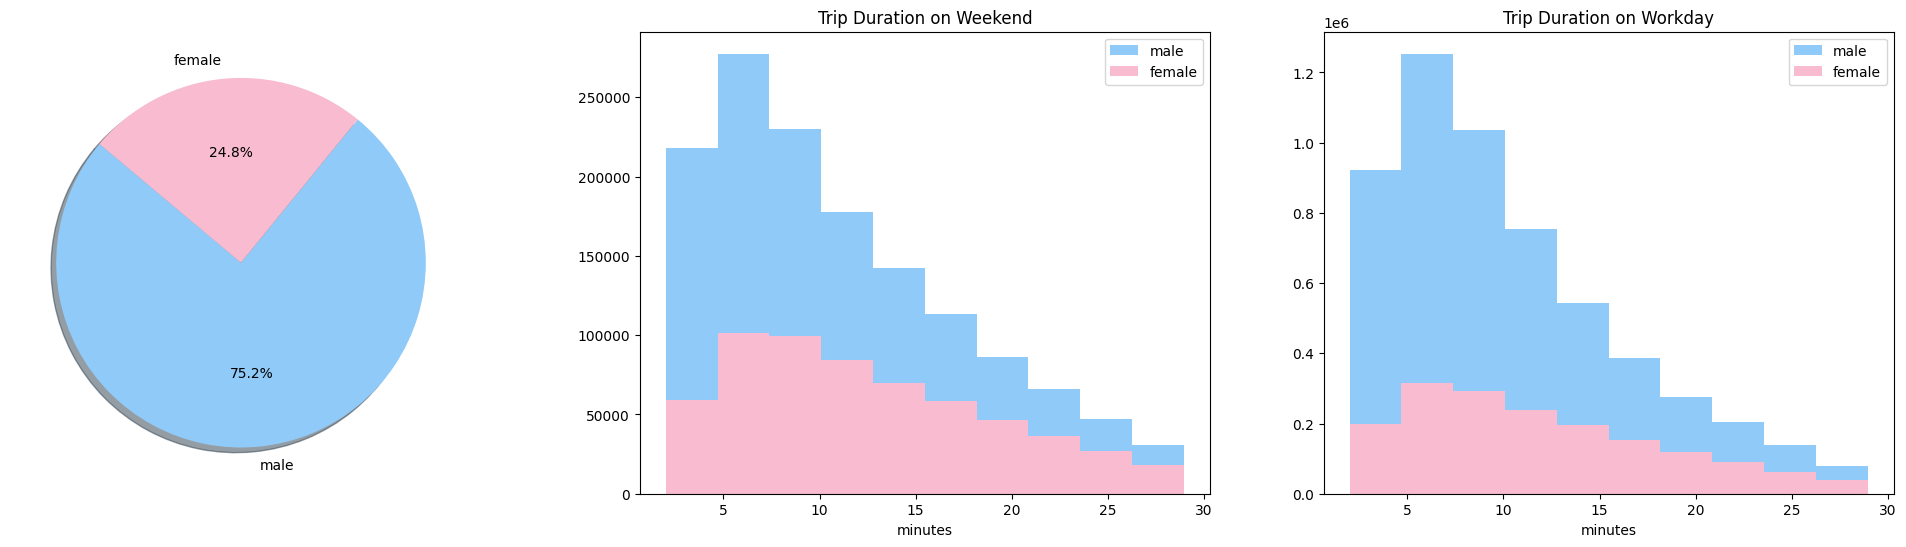

<Figure size 320x320 with 0 Axes>

In [8]:
male_dayoff_duration = data.loc[data['gender']=='Male'][(data['Holiday'] == 1) | (data['Weekend'] == 1)]['tripduration']
male_workday_duration = data.loc[data['gender']=='Male'][(data['Holiday'] == 0) & (data['Weekend'] == 0)]['tripduration']


female_dayoff_duration = data.loc[data['gender']=='Female'][(data['Holiday'] == 1) | (data['Weekend'] == 1)]['tripduration']
female_workday_duration = data.loc[data['gender']=='Female'][(data['Holiday'] == 0) & (data['Weekend'] == 0)]['tripduration']

fig, axs = plt.subplots(1, 3)
fig.set_figheight(6)
fig.set_figwidth(25)

figure(figsize=(4, 4), dpi=80)
axs[0].pie(data['gender'].value_counts().values, labels=['male', 'female'], colors=[COLORS[1], COLORS[0]], autopct='%1.1f%%', shadow=True, startangle=140)

axs[1].hist(male_dayoff_duration.values, color=COLORS[1])
axs[1].hist(female_dayoff_duration.values, color=COLORS[0])
axs[1].set_title('Trip Duration on Weekend')
axs[1].set_xlabel('minutes')
axs[1].legend(['male', 'female'])

axs[2].hist(male_workday_duration.values, color=COLORS[1])
axs[2].hist(female_workday_duration.values, color=COLORS[0])
axs[2].set_title('Trip Duration on Workday')
axs[2].set_xlabel('minutes')
axs[2].legend(['male', 'female'])

plt.show()

A larger proportion of men prefer bike rides over women

#### Next a look at how the number of rides vary over the weekend compared to weekdays

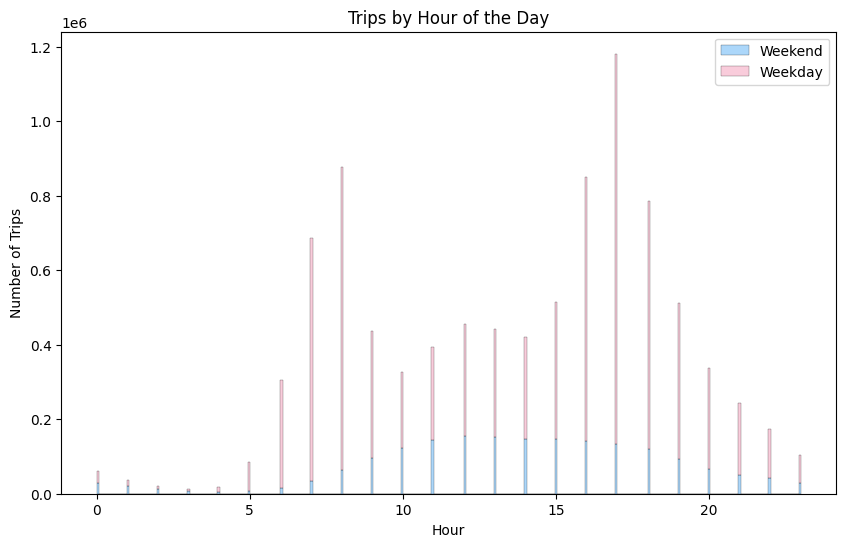

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='hour', hue='Weekend', multiple='stack', palette=COLORS[:2])
plt.title('Trips by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.legend(['Weekend', 'Weekday'])
plt.show()

#### As seen, there are more rentals on the weekdays maybe indicating bicycles are usually rented for work or school/college than on adventure/relaxation on weekdays

#### Next we look at how temperture, severe events affect ridership as well as monthly changes

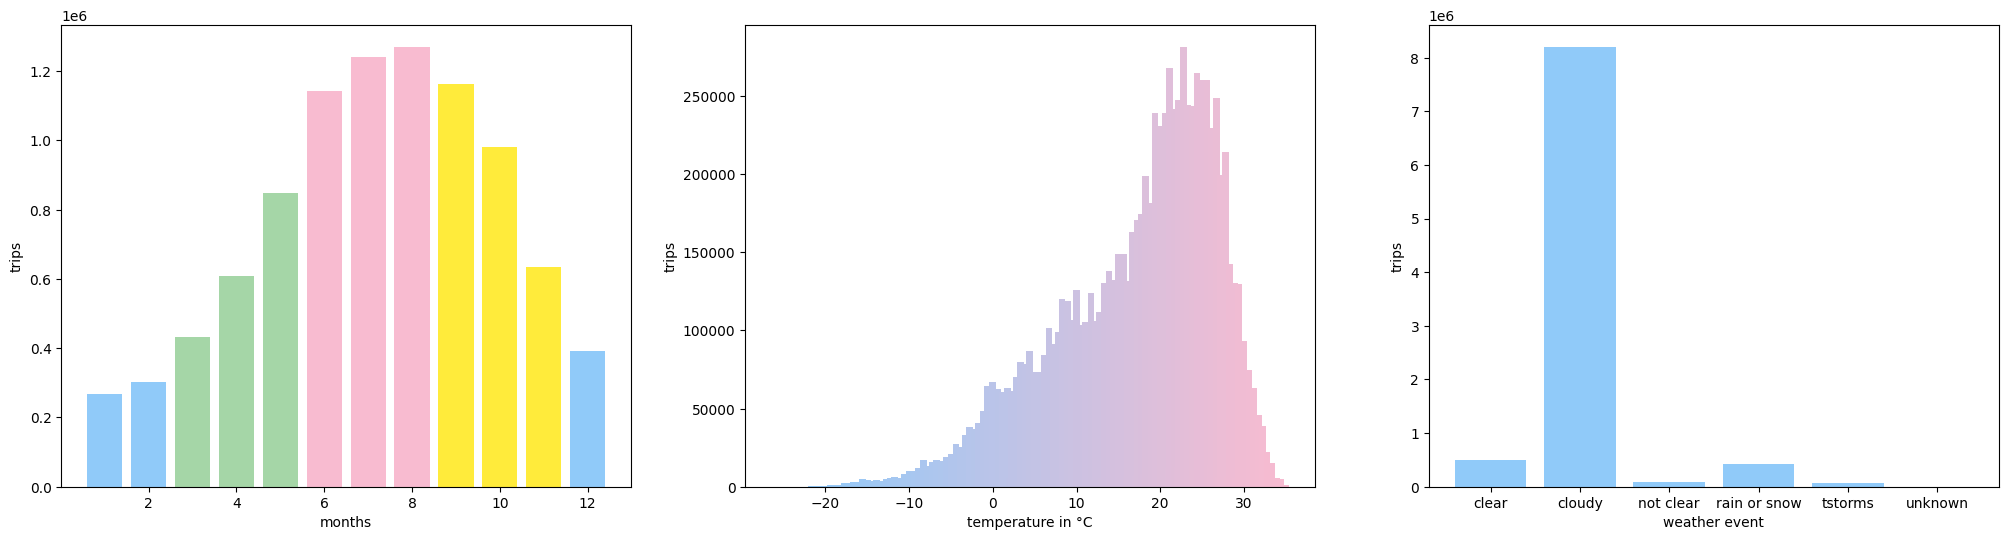

In [10]:
df_month_duration_count = data.groupby('month')['trip_id'].count()
df_temp_count = data.groupby('temperature')['trip_id'].count()
df_events_count = data.groupby('events')['trip_id'].count()

fig, axs = plt.subplots(1, 3)
fig.set_figheight(6)
fig.set_figwidth(25)
axs[0].bar(x=df_month_duration_count.keys(), height=df_month_duration_count.values, color=COLORS[1:2]*2 + COLORS[2:3]*3 + COLORS[0:1]*3 + COLORS[3:4]*3 + COLORS[1:2])
axs[1].bar(x=df_temp_count.keys(), height=df_temp_count.values, color=colorGradient(COLORS[1], COLORS[0], len(df_temp_count)))
axs[2].bar(x=df_events_count.keys(), height=df_events_count.values, color=COLORS[1])

axs[0].set_ylabel('trips')
axs[0].set_xlabel('months')

axs[1].set_xlabel('temperature in °C')
axs[1].set_ylabel('trips')

axs[2].set_xlabel('weather event')
axs[2].set_ylabel('trips')

plt.show()

People often take bikes when it's warm but cloudy. However, this is because the weather in Chicago is generally quite cloudy.

#### This plot provides insights into how trip count and trip duration differ between workdays and weekends/holidays.

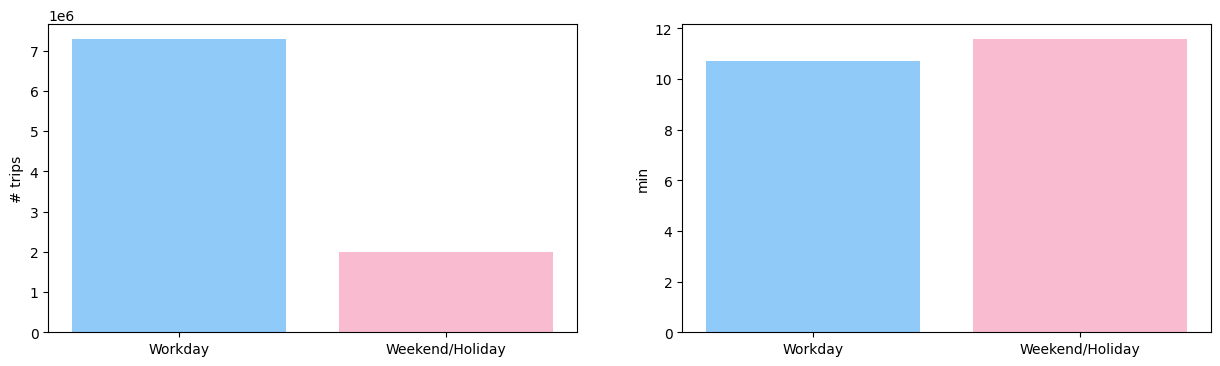

In [11]:
dayoff_count = data[(data['Holiday'] == 1) | (data['Weekend'] == 1)]['trip_id'].count()
workday_count = data[(data['Holiday'] == 0) & (data['Weekend'] == 0)]['trip_id'].count()

dayoff_mean = data[(data['Holiday'] == 1) | (data['Weekend'] == 1)]['tripduration'].mean()
workday_mean = data[(data['Holiday'] == 0) & (data['Weekend'] == 0)]['tripduration'].mean()


fig, axs = plt.subplots(1, 2)
fig.set_figheight(4), fig.set_figwidth(15)


axs[0].bar(x=['Workday', 'Weekend/Holiday'], height=[workday_count, dayoff_count], color=COLORS[1:2] + COLORS[0:1])
axs[0].set_ylabel('# trips')

axs[1].bar(x=['Workday', 'Weekend/Holiday'], height=[workday_mean, dayoff_mean], color=COLORS[1:2] + COLORS[0:1])
axs[1].set_ylabel('min')

plt.show()

Not much of a differnece in trip duration between weekends and weekdays

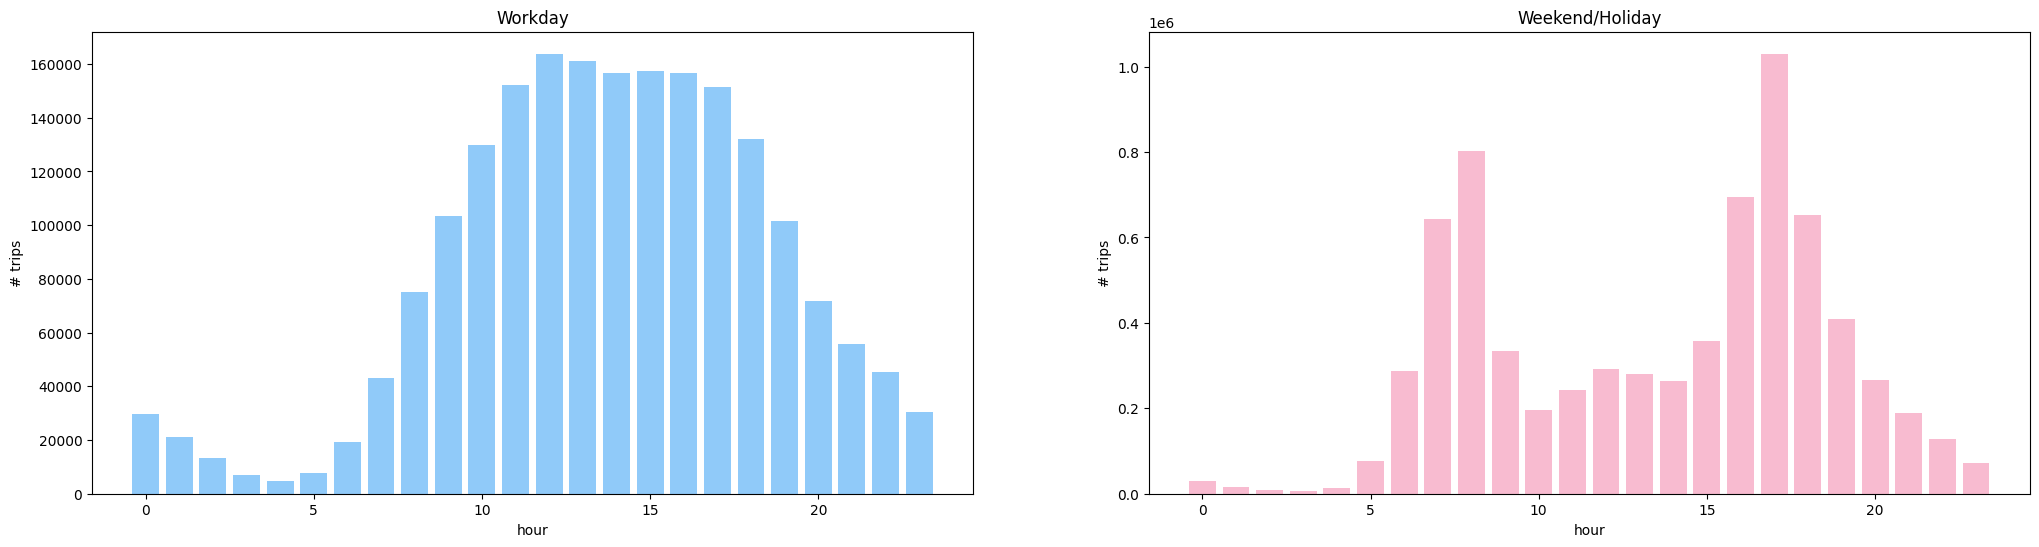

In [12]:
dayoff_count_hours = data[(data['Holiday'] == 1) | (data['Weekend'] == 1)].groupby('hour')['trip_id'].count()
workday_count_hours = data[(data['Holiday'] == 0) & (data['Weekend'] == 0)].groupby('hour')['trip_id'].count()

fig, axs = plt.subplots(1, 2)
fig.set_figheight(6), fig.set_figwidth(25)

axs[0].set_title('Workday'), axs[1].set_title('Weekend/Holiday')

axs[0].set_xlabel('hour'), axs[0].set_ylabel('# trips')

axs[1].set_xlabel('hour'), axs[1].set_ylabel('# trips')

axs[0].bar(x=dayoff_count_hours.keys(), height=dayoff_count_hours.values, color=COLORS[1])
axs[1].bar(x=workday_count_hours.keys(), height=workday_count_hours.values, color=COLORS[0])

plt.show()

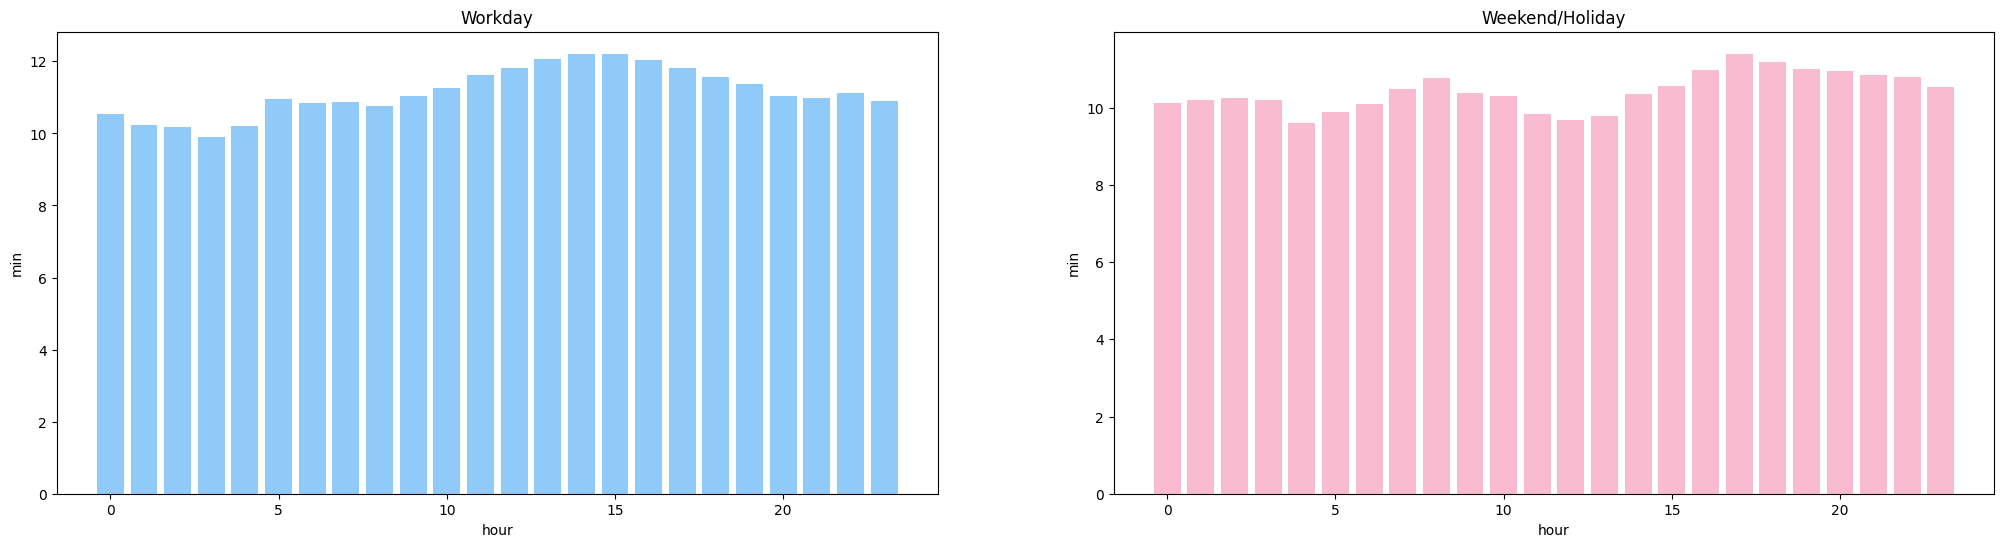

In [13]:
dayoff_duration_hours = data[(data['Holiday'] == 1) | (data['Weekend'] == 1)].groupby('hour')['tripduration'].mean()
workday_duration_hours = data[(data['Holiday'] == 0) & (data['Weekend'] == 0)].groupby('hour')['tripduration'].mean()

fig, axs = plt.subplots(1, 2)
fig.set_figheight(6), fig.set_figwidth(25)

axs[0].set_title('Workday'), axs[1].set_title('Weekend/Holiday')

axs[0].set_xlabel('hour'), axs[0].set_ylabel('min')

axs[1].set_xlabel('hour'), axs[1].set_ylabel('min')

axs[0].bar(x=dayoff_count_hours.keys(), height=dayoff_duration_hours.values, color=COLORS[1])
axs[1].bar(x=workday_count_hours.keys(), height=workday_duration_hours.values, color=COLORS[0])

plt.show()

### Next, below show the growth in number of rentals of bikes over the months over 3 or 4 years

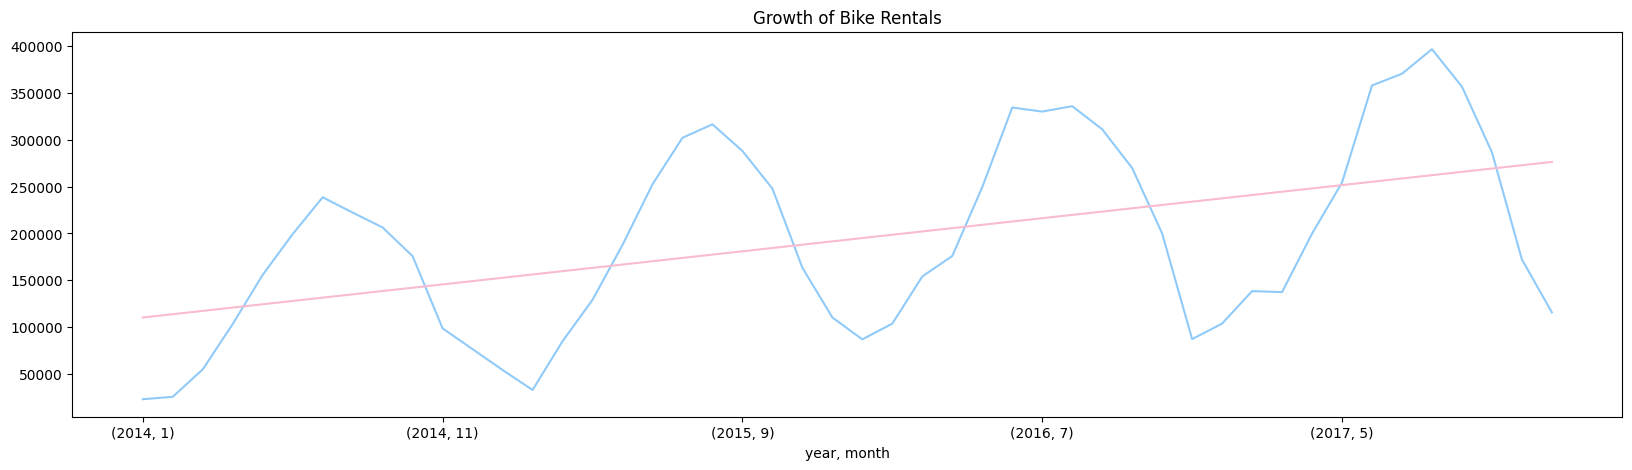

In [14]:
months_trips_counts = data.groupby(['year', 'month'])['trip_id'].count()
figure(figsize=(20, 5))

x = range(len(months_trips_counts.values))
z = np.polyfit(x, months_trips_counts.values, 1)
p = np.poly1d(z)

months_trips_counts.plot(c=COLORS[1])
plt.plot(x, p(x), c=COLORS[0])

plt.xlabel('year, month')
plt.title('Growth of Bike Rentals')
plt.show()

#### Below we list the most important stations like most popular and least popular arrival and destination stations

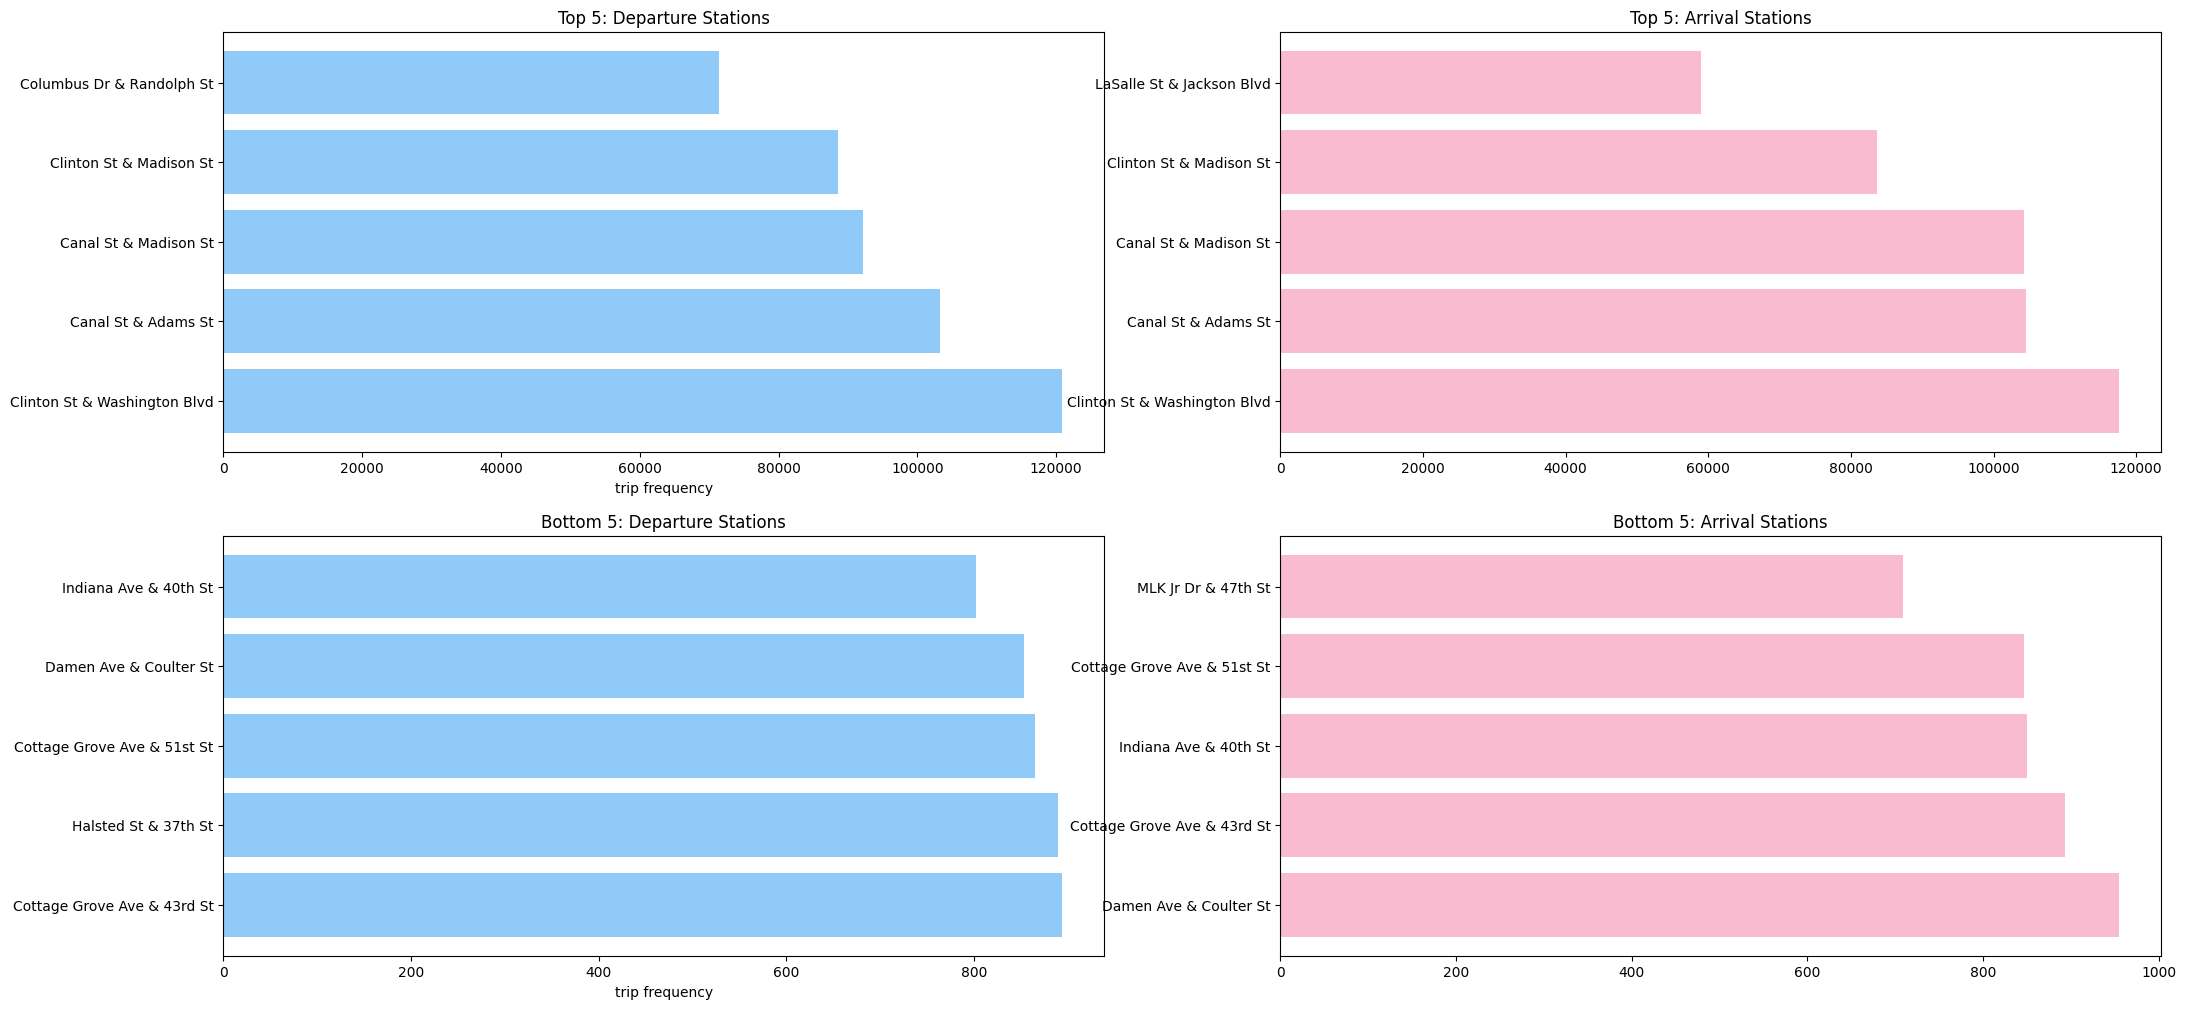

In [15]:
pivot_table1 = pd.pivot_table(data, index=['from_station_name'], columns=['year'], values=['trip_id'], aggfunc='count')
pivot_table2 = pd.pivot_table(data, index=['to_station_name'], columns=['year'], values=['trip_id'], aggfunc='count')

old_stations1 = []  # since 2015
old_stations2 = []

for station_name in pivot_table1.index:
    if not pd.isna(sum(pivot_table1.loc[station_name])):
        old_stations1.append(station_name)

for station_name in pivot_table2.index:
    if not pd.isna(sum(pivot_table1.loc[station_name])):
        old_stations2.append(station_name)

old_stations = set(old_stations1 + old_stations2)

df_old_stations = data[(data['from_station_name'].isin(old_stations)) & (data['to_station_name'].isin(old_stations))] 

top_stations_from = df_old_stations['from_station_name'].value_counts()[:5]
top_stations_to = df_old_stations['to_station_name'].value_counts()[:5]

bottom_stations_from = df_old_stations['from_station_name'].value_counts()[-5:]
bottom_stations_to = df_old_stations['to_station_name'].value_counts()[-5:]

fig, axs = plt.subplots(2, 2)
fig.set_figheight(12), fig.set_figwidth(25)

axs[0][0].barh(y=top_stations_from.keys(), width=top_stations_from.values, color=COLORS[1])
axs[0][0].set_xlabel('trip frequency')
axs[0][0].set_title('Top 5: Departure Stations')

axs[0][1].barh(y=top_stations_to.keys(), width=top_stations_to.values, color=COLORS[0])
axs[0][1].set_title("Top 5: Arrival Stations")

axs[1][0].barh(y=bottom_stations_from.keys(), width=bottom_stations_from.values, color=COLORS[1])
axs[1][0].set_xlabel('trip frequency')
axs[1][0].set_title('Bottom 5: Departure Stations')

axs[1][1].barh(y=bottom_stations_to.keys(), width=bottom_stations_to.values, color=COLORS[0])
axs[1][1].set_title("Bottom 5: Arrival Stations")

plt.show()

#### Below plot represent the 5 most popular routes taken by the commuters

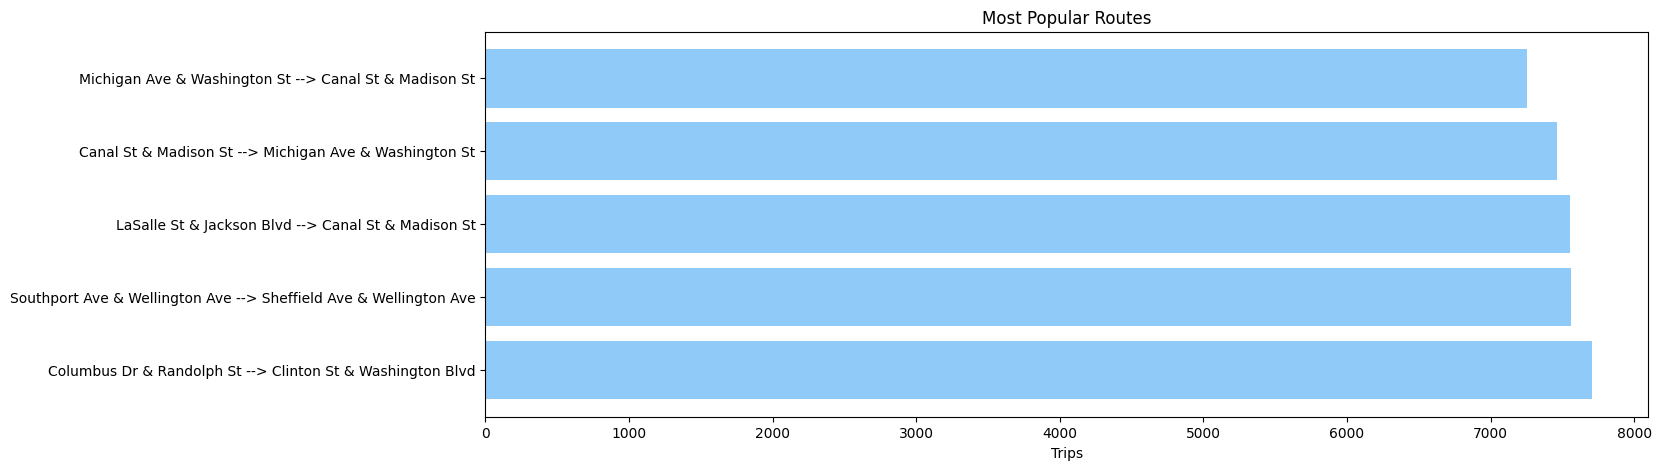

In [16]:
top5_pairs = df_old_stations[['from_station_name', 'to_station_name']].value_counts().reset_index(name='count')[:5]

figure(figsize=(15, 5))
plt.barh(y=(top5_pairs['from_station_name'] + ' --> ' + top5_pairs['to_station_name']).values, width=top5_pairs['count'].values, color=COLORS[1])
plt.title("Most Popular Routes")
plt.xlabel('Trips')
plt.show()

### Conclusion

- **Gender Distribution**: Nearly 23% of all customers are male. On average, women ride bikes for one minute longer than men.

- **Seasonal and Temperature Trends**: Bikes are rented more frequently in summer and during hot weather. The most popular temperature is around 22°C, and the most popular month for rentals is August, while January is the least popular month.

- **Trip Duration**: People tend to ride longer in summer and hot weather. Only rain and storms significantly reduce the average trip duration by almost a minute.

- **Weekdays vs Weekends/Holidays**: On weekdays, people rent bikes four times more often than on weekends and holidays. Additionally, the average trip duration on weekdays is about one minute shorter than on weekends and holidays.

- **Travel Distribution by Day Type**: The distributions of trips on weekdays and weekends/holidays are different. Weekdays show a unimodal normal distribution with a peak around 1:00 PM, while weekends/holidays have a bimodal normal distribution with peaks around 8:00 AM and 5:00 PM.

- **Trend Over Time**: The number of trips over the years shows a positive, seasonal trend.

- **Most Popular Route**: The most popular bike trip starts at Columbus Dr & Randolph St and ends at Clinton St & Washington Blvd.


# DATA PREPROCESSING AND FEATURE ENGINEERING

### This section defines helper functions to preprocess data, evaluate models, and visualize predictions:

1. bs_create_polynomial_terms: Generates polynomial features for the training and testing datasets using a specified degree as they help capture non-linear relationships in data.

2. bs_scale_mean_std: Scales data to have zero mean and unit variance. Feature scaling ensures all features contribute equally to the model.

3. bs_fit_and_save: Fits a given model, calculates mean squared error (MSE), and variance score on the training data. Stores model performance metrics in a global list model_results for later comparison. Helps track the performance of various models systematically.

4. bs_accuracy: Computes and prints accuracy metrics for classification tasks, including normalized accuracy and raw accuracy.

5. plot_chart_predict: Visualizes model predictions versus actual values over a specified range of days.

In [17]:
# Define Helper Functions
def bs_create_polynomial_terms(l_train, l_test, degree):
    from sklearn.preprocessing import PolynomialFeatures
    poly = PolynomialFeatures(degree=degree)
    l_train_poly = poly.fit_transform(l_train) 
    l_test_poly = poly.fit_transform(l_test)
    return l_train_poly, l_test_poly
    
def bs_scale_mean_std(l_train, l_test):
    sc = StandardScaler()
    l_train_scaled = pd.DataFrame(sc.fit_transform(l_train))
    l_test_scaled = pd.DataFrame(sc.transform(l_test)) # careful, transform() only.
    return l_train_scaled, l_test_scaled

# List to store results
model_results = []

def bs_fit_and_save(clf, l_train, l_target, l_test, filename, model_name):
    # more about it here: http://scikit-learn.org/stable/modules/svm.html#regression
    clf.fit (l_train, l_target)
    #MSE
    predict_train = clf.predict(l_train)
    mse = mean_squared_error(l_target, predict_train)
    print("Mean Squared Error: %.2f" % mse)
    # Explained variance score: 1 is perfect prediction
    variance_score = clf.score(l_train, l_target)
    print('Variance score: %.2f' % clf.score(l_train, l_target))
    
    model_results.append({
        'Model': model_name,
        'MSE': mse,
        'Variance Score': variance_score
    })
    
    return clf

def bs_accuracy(test, pred):   
    print('Accuracy norm. = {:.2f}'.format(accuracy_score(test, pred)))
    print('Accuracy = {:.0f}'.format(accuracy_score(test, pred, normalize=False)))

def plot_chart_predict(x__plot, model, x_test, y_test, bot, top, desc):
    y_pred = model.predict(x_test)
    v_title = "Travel Prediction - Model: " + desc

    
    plt.rcParams["figure.figsize"] = (15,9)
    plt.plot(x__plot['date2'][bot:top], np.exp(np.log(y_test[bot:top])),  color='black', label="Real Value")
    plt.plot(x__plot['date2'][bot:top], np.exp(y_pred[bot:top]),10, color='blue', linewidth=3,  label="Prediction")
    plt.legend(loc='upper right')
    plt.title(v_title, fontsize=16, fontweight='bold')
    plt.xlabel("Day")
    plt.ylabel("Travel")
    plt.show()    

In [18]:
df_holidays = pd.DataFrame(holidays)
df_holidays['date'] = pd.to_datetime(df_holidays[0]).dt.date
df_holidays['holiday'] = 1
df_holidays = df_holidays.drop([0], axis=1)


#Extracting only day value from date.
df.day =  df.starttime.astype(str).str.slice(8,10).astype(int)

### Some more feature engineered columns like 'season' column and also converting certain columns into required formats like the date column into date datatype

In [19]:
#New features
df['start_time'] = df['starttime']
df.starttime = pd.to_datetime(df.starttime)
df.stoptime  = pd.to_datetime(df.stoptime)
df['date']   = df.starttime.dt.date

#Adding weekend column
df['weekend'] = np.where(df.starttime.dt.weekday > 4 , 1, 0)

#Adding season column
df['season'] = ''

for x in range(df.year.min().astype(int), df.year.max().astype(int)+1):
    #Spring: 21-03 to 20-06
    df.loc[(df.starttime > str(x)+'-03-21 00:00:00') & (df.starttime < str(x)+'-06-20 23:59:59'),  'season'] = 'Spring'
    #Summer:     21-06 to 20-09
    df.loc[(df.starttime > str(x)+'-06-21 00:00:00') & (df.starttime < str(x)+'-09-20 23:59:59'),  'season'] = 'Summer'
    #Autumn:    21-09 até 20-12
    df.loc[(df.starttime > str(x)+'-09-21 00:00:00') & (df.starttime < str(x)+'-12-20 23:59:59'),  'season'] = 'Autumn'
    #Winter:   21-12 até 20-03
    df.loc[(df.starttime > str(x)+'-12-21 00:00:00') & (df.starttime < str(x+1)+'-03-20 23:59:59'),'season'] = 'Winter'
    

#Merging holidasys column to the data
df_holidays.head()
df_join = df.set_index('date').join(df_holidays.set_index('date'))
df_join['isholiday']  = np.where(df_join.holiday==1, 1, 0)
df_join['regularday'] = np.where(df_join.isholiday+df_join.weekend == 0, 1, 0)


df = df_join   # using df for exploratory data analysis

### Label Encoding of Categorial columns

##### Gender Encoding: Converts gender values ("Male" and "Female") into numerical values (0 and 1, respectively).

##### User Type Encoding:Encodes the usertype column (e.g., "Customer", "Subscriber") using Label Encoder

##### Station Name Encoding: Encodes the to_station_name column to numeric values

##### Season Encoding: Encodes the season column numerically

##### Converting Date and Time Columns: Ensures columns year, month, day, and hour are of integer type.

In [20]:
#Label Encoding for gender, usertype, station names and season columns

# Replace all male and female genders with '0's and '1's respectively
df_join.loc[df_join["gender"] == "Male", "gender"] = 0
df_join.loc[df_join["gender"] == "Female", "gender"] = 1

# User Type column
lb_usertype = LabelEncoder()
df_join["usertype_code"] = lb_usertype.fit_transform(df_join["usertype"])
df_join[["usertype", "usertype_code"]].head(11)

#Station name
lb_to_station_name = LabelEncoder()
df_join["to_station_name_code"] = lb_usertype.fit_transform(df_join["to_station_name"])
df_join[["to_station_name", "to_station_name_code"]].head(11)


#Season
lb_season = LabelEncoder()
df_join["season_code"] = lb_season.fit_transform(df_join["season"])
df_join[["season", "season_code"]].head(11)


# convert string to int
df_join[['year', 'month', 'day', 'hour']] = df_join[['year', 'month', 'day', 'hour']].astype(int)

### Selecting Important columns for Model training

#### Key columns such as 'year', 'month', 'day', 'weekend', 'season_code', 'isholiday', and 'regularday' are chosen for their potential impact on trip patterns. 

#### A new column, trip_count, is introduced to count individual trips, which will serve as the target variable for predictions.

In [21]:
#Selecting features for model
col = [
'year',
 'month',
    'day',
'weekend',
'season_code',
'isholiday',
'regularday'
]

df_join['trip_count'] = 1

#Aggregation
df_join_agg1 =  df_join.groupby(col).aggregate({'trip_count' : 'sum'}).reset_index()

### Splitting of data based on year, such that year 2016 is sused for training and testing whereas year 2017 data is used for validation

In [22]:
#split datasets to train/test and validation
df_join_agg_2017 = df_join_agg1[df_join_agg1.year == 2017]
df_join_agg_2016 = df_join_agg1[df_join_agg1.year != 2017]

In [23]:
y = df_join_agg_2016.trip_count

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df_join_agg_2016, y, test_size=0.25)

X_train = X_train.drop(labels=["trip_count"], axis=1)
X_test = X_test.drop(labels=["trip_count"], axis=1)

y_valida = df_join_agg_2017.trip_count
X_valida = df_join_agg_2017.drop(labels=["trip_count"], axis=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


x_plot = X_test.copy()
x_plot['date2'] = x_plot['year'].astype(str) +  x_plot['day'].astype(str) +  x_plot['month'].astype(str) 
x_plot2 = X_valida.copy()
x_plot2['date2'] = x_plot2['year'].astype(str) +  x_plot2['day'].astype(str) +  x_plot2['month'].astype(str) 

(824, 7) (824,)
(275, 7) (275,)


##### The x_plot dataframe above is used to facilitate chronological plotting or comparison of predictions and actual values

#### CORRELATION MATRIX of the selected columns

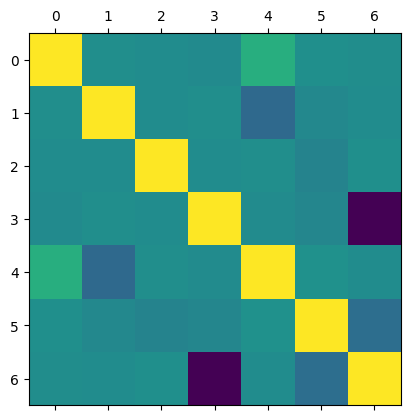

In [24]:
plt.matshow(X_train.corr())

# MODELS

### Baseline

#### A simple baseline Linear Regresssion model is used to train on the X_train features and the log-transformed target variable y_train. After fitting the model, predictions are made on the test set X_test, and the Mean Squared Error (MSE) and R² score are calculated to evaluate the model's performance. Finally, the results are visualized by plotting both the actual test data and the model’s predictions against time.

In [25]:
lm = linear_model.LinearRegression()
lm.fit(X_train, np.log(y_train))

LinearRegression()

Mean squared error: 48005727.17
Variance score: -2.68


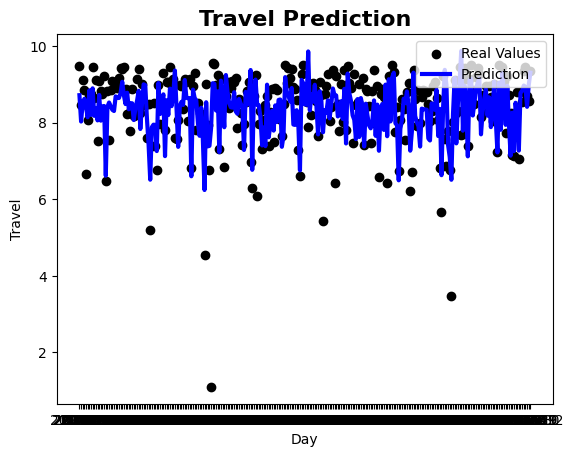

In [26]:
y_train = np.log(y_train)
y_pred  = lm.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

plt.scatter(x_plot['date2'], np.log(y_test),  color='black', label="Real Values")
plt.plot(x_plot['date2'], y_pred, color='blue', linewidth=3,  label="Prediction")
plt.rcParams["figure.figsize"] = (15,9)
plt.legend(loc='upper right')
plt.title("Travel Prediction", fontsize=16, fontweight='bold')
plt.xlabel("Day")
plt.ylabel("Travel")
plt.show()
plt.clf()
plt.cla()
plt.close()

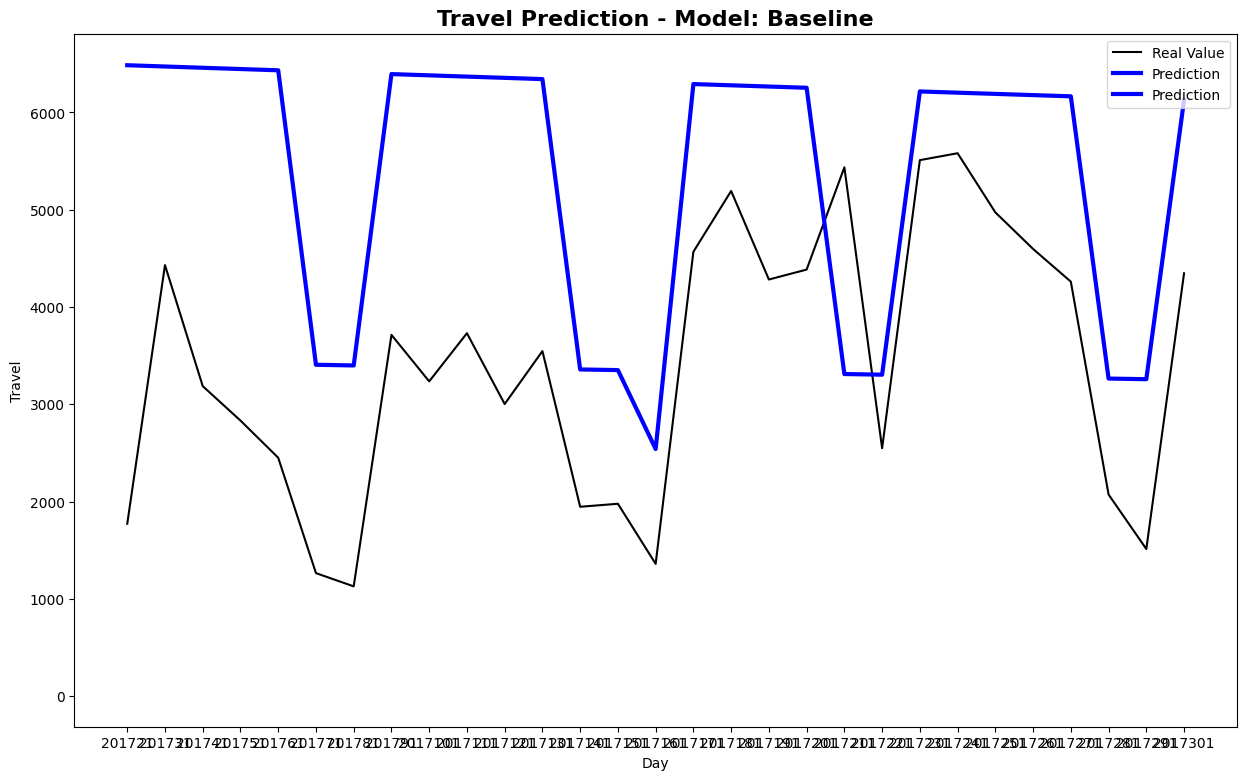

In [27]:
plot_chart_predict(x_plot2, bot=1,top=30,model=lm,x_test=X_valida,y_test=y_valida,desc="Baseline")

### Model 1 - Simple Linear Regression model

Mean Squared Error: 0.94
Variance score: 0.28


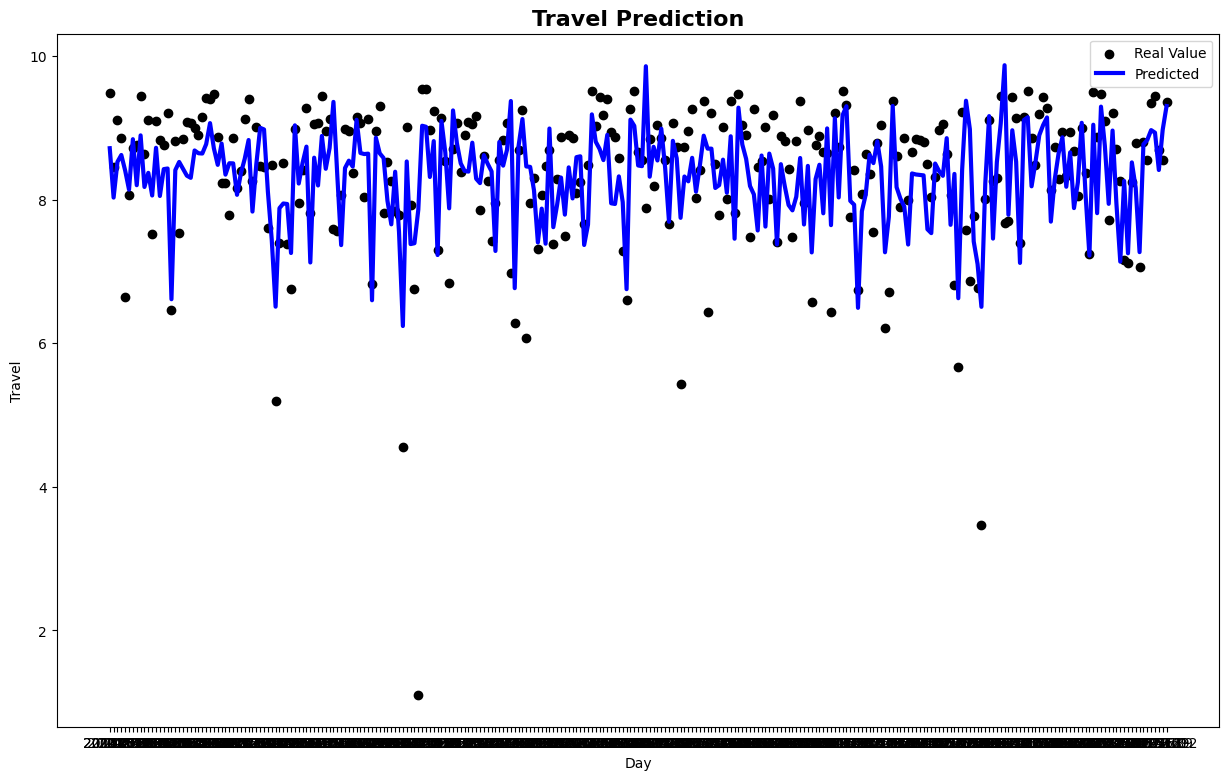

In [28]:
# Simple Linear Regression
# Since its a regression problem we will first develop simple linear regression

# Create linear regression object
model1 = linear_model.LinearRegression()

# get fitted regresser
model1 = bs_fit_and_save(model1, X_train, y_train, X_test, "output_SLR", 'Model 1: Simple LinearRegression')
y_pred  = model1.predict(X_test)


plt.scatter(x_plot['date2'], np.log(y_test),  color='black', label="Real Value")
plt.plot(x_plot['date2'], y_pred, color='blue', linewidth=3,  label="Predicted")

plt.rcParams["figure.figsize"] = (15,9)
plt.legend(loc='upper right')
plt.title("Travel Prediction", fontsize=16, fontweight='bold')
plt.xlabel("Day")
plt.ylabel("Travel")
plt.show()

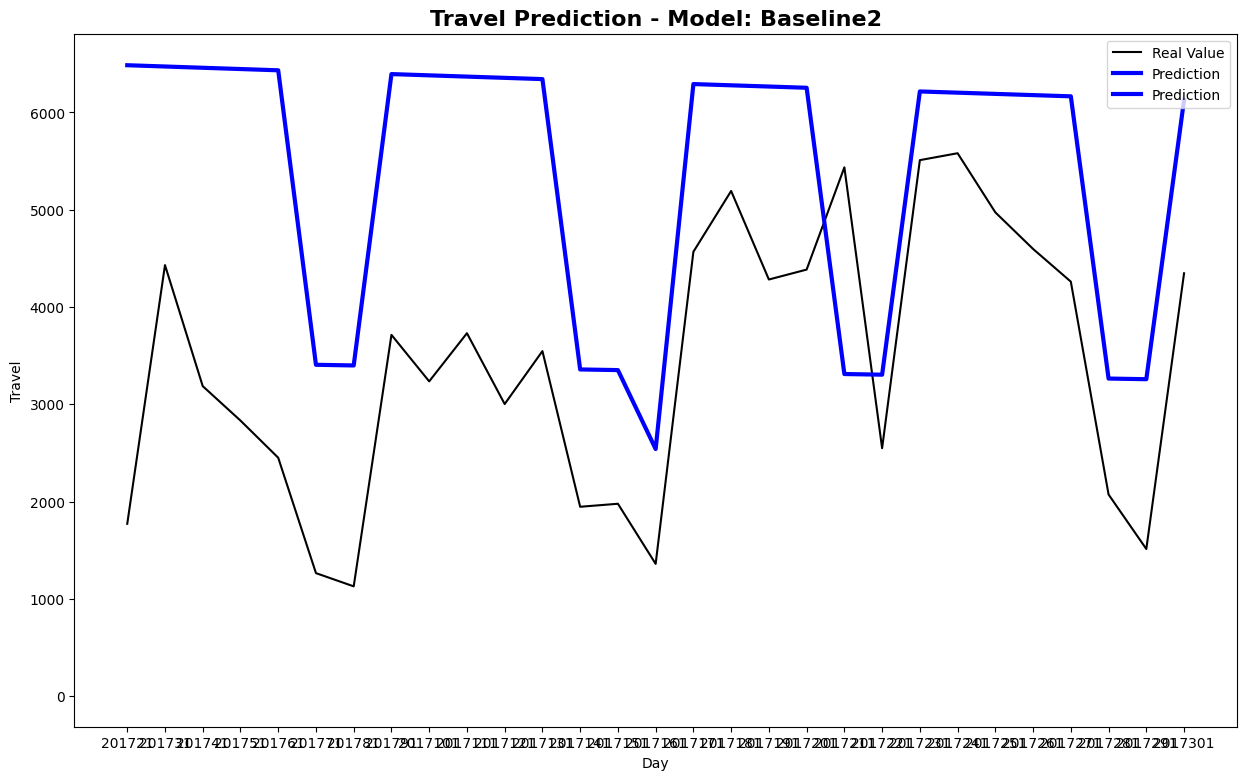

In [29]:
plot_chart_predict(x_plot2, bot=1,top=30,model=model1,x_test=X_valida,y_test=y_valida,desc="Baseline2")

### MODEL 2 - LR with Ridge Regression

#### Ridge Regression is a regularized version of linear regression that introduces a penalty term to prevent overfitting, which is particularly useful when the model has many features or multicollinearity

Mean Squared Error: 0.94
Variance score: 0.28
Coefficients: 
 [ 0.20066951  0.42512768 -0.01701083 -0.25367818  0.25928502 -0.14269056
  0.0353367 ]
Alpha: 
 10.0


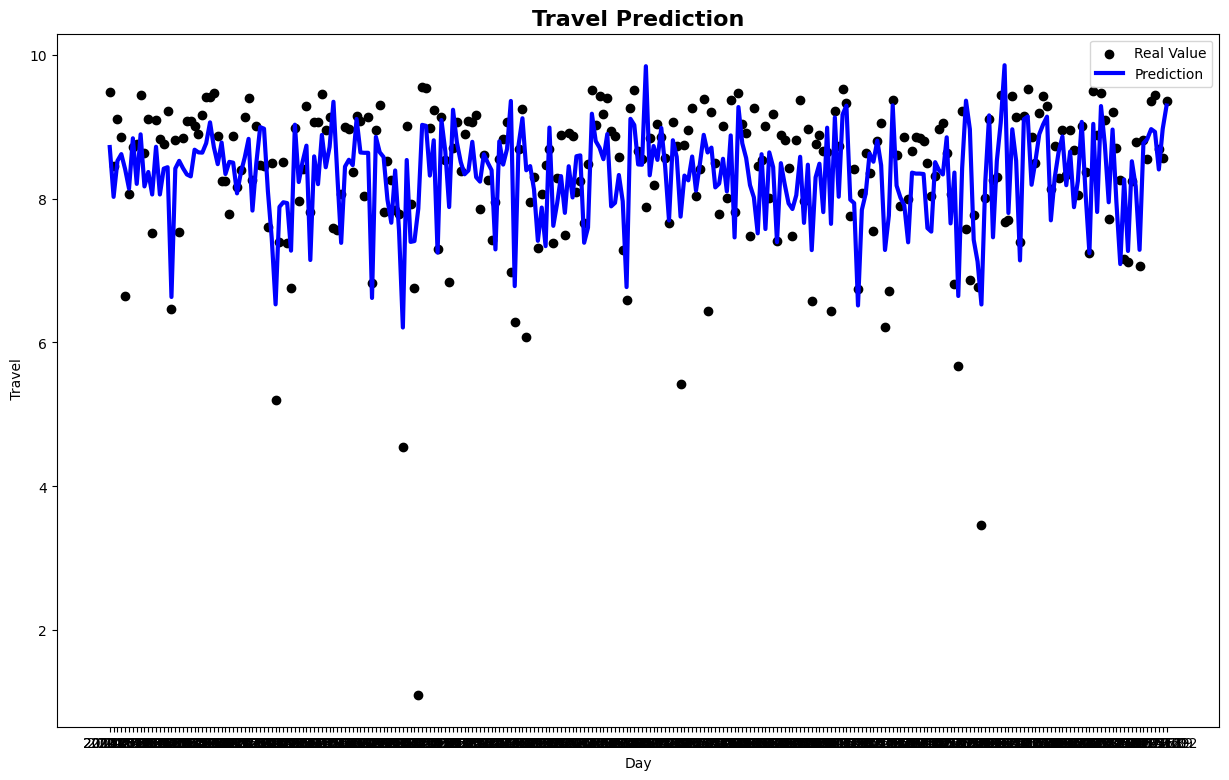

In [30]:
# Simple Linear Regression with Ridge Regression

# Unlike simple linear regression, ridge regularization requires scaled data
train_scaled, test_scaled = bs_scale_mean_std(X_train, X_test)

# first we will perform cross-validation to find the best alpha value
model2 = linear_model.RidgeCV(alphas=[0.0001, 0.001, 0.1, 1.0, 10.0, 100.0, 1000.0])

model2 = bs_fit_and_save(model2, train_scaled, y_train, test_scaled, "output_Ridge", "Model 2: LinearRigression_Ridge")

# The coefficients
print('Coefficients: \n', model2.coef_)
print('Alpha: \n', model2.alpha_) 

y_pred  = model2.predict(test_scaled)
plt.scatter(x_plot['date2'], np.log(y_test),  color='black', label="Real Value")
plt.plot(x_plot['date2'], y_pred, color='blue', linewidth=3,  label="Prediction")
plt.rcParams["figure.figsize"] = (15,9)
plt.legend(loc='upper right')
plt.title("Travel Prediction", fontsize=16, fontweight='bold')
plt.xlabel("Day")
plt.ylabel(" Travel")
plt.show()

### MODEL 3 - LinearRegression with Lasso

#### Lasso Regression, like Ridge, is a regularized form of linear regression, but it uses L1 regularization, which can also perform feature selection by driving some coefficients to zero. This can help simplify the model and prevent overfitting, particularly when there are many features.

Mean Squared Error: 0.94
Variance score: 0.28
Alpha: 
 0.001


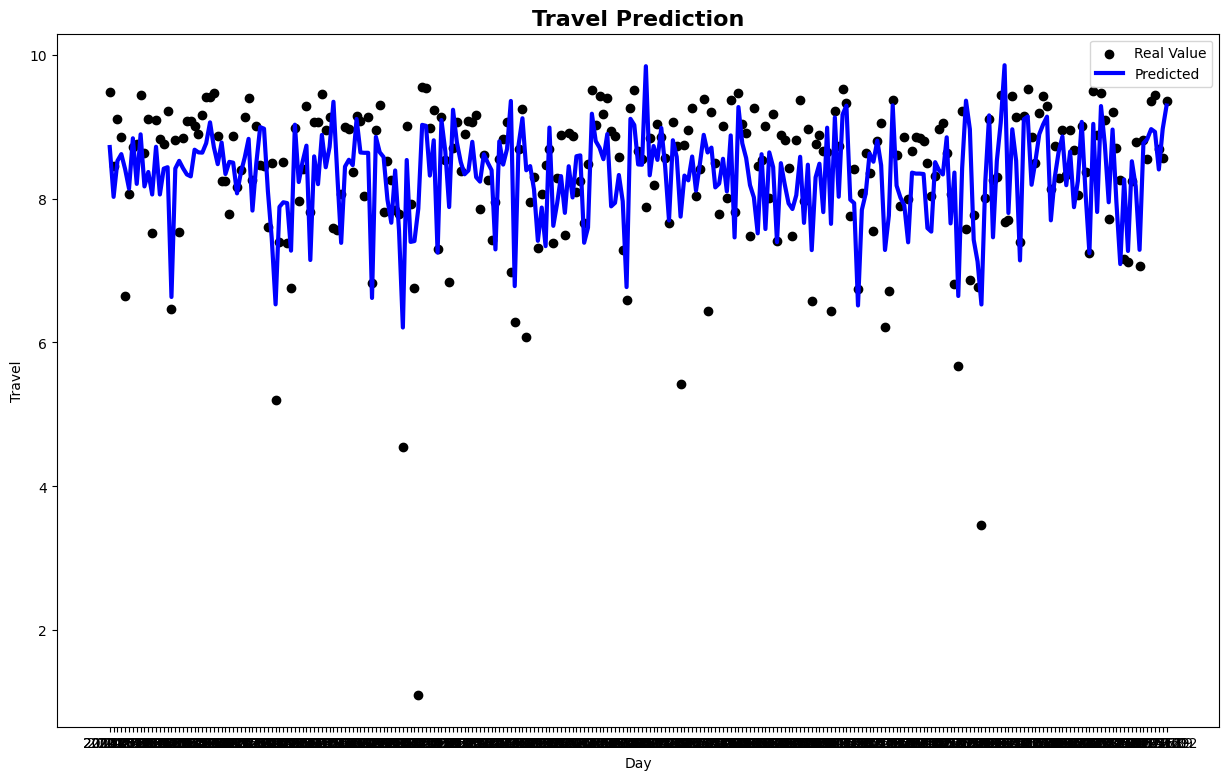

In [31]:
# Simple Linear Regression with Lasso Regression

# Unlike simple linear regression, lasso regularization requires scaled data
train_scaled, test_scaled = bs_scale_mean_std(X_train, X_test)

# first we will perform cross-validation to find the best alpha value
model3 = linear_model.LassoCV(alphas=[0.001, 0.1, 1.0, 10.0, 100.0, 1000.0])

# get fitted regresser
model3 = bs_fit_and_save(model3, train_scaled, y_train, test_scaled, "output_Lasso", "Model 3: LinearRegression_Lasso")

# The coefficients
print('Alpha: \n', model3.alpha_)  

plt.scatter(x_plot['date2'], np.log(y_test),  color='black', label="Real Value")
plt.plot(x_plot['date2'], y_pred, color='blue', linewidth=3,  label="Predicted")

plt.rcParams["figure.figsize"] = (15,9)
plt.legend(loc='upper right')
plt.title("Travel Prediction", fontsize=16, fontweight='bold')
plt.xlabel("Day")
plt.ylabel("Travel")
plt.show()

### MODEL 4 - LR with Polynomial Terms

#### Polynomial regression allows us to model non-linear relationships by adding polynomial terms to the features. This is useful when the relationship between the independent variables (features) and the target variable (travel count) is not strictly linear.

In [32]:
# Simple Linear Regression with Polynomial terms

# create polynomial terms
train_poly, test_poly = bs_create_polynomial_terms(X_train, X_test, 2)

# Create linear regression object
model4 = linear_model.LinearRegression()

# get fitted regresser
model4 = bs_fit_and_save(model4, train_poly, y_train, test_poly, "output_poly_d2", "Model 4: LinearRegressionPolynomialTerms")

Mean Squared Error: 0.51
Variance score: 0.61


### MODEL 5 - Ridge Regresssion with Polynomial Terms

##### Ridge Regression with Polynomial Terms is applied to improve model performance by incorporating regularization (Ridge) and polynomial features. First, polynomial terms of degree 2 are generated using the bs_create_polynomial_terms function, which enhances the model’s ability to capture non-linear relationships in the data. Next, the data is scaled using bs_scale_mean_std since Ridge Regression benefits from standardized input features. Ridge regularization helps control overfitting by penalizing large coefficients, thus preventing the model from becoming too complex.

Mean Squared Error: 0.52
Variance score: 0.60


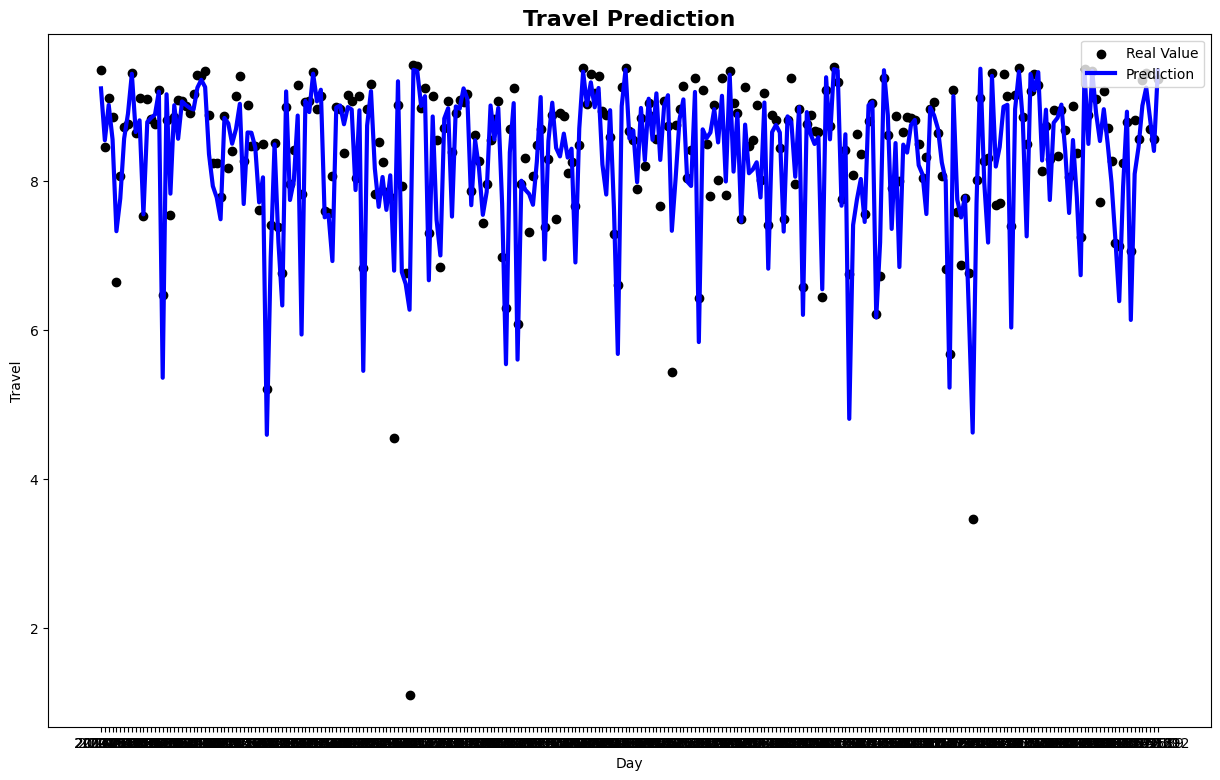

In [33]:
# Ridge Regression with Polynomial Terms

# create polynomial terms
train_poly, test_poly = bs_create_polynomial_terms(X_train, X_test, 2)

# Ridge regularization requires scaled data
train_scaled, test_scaled = bs_scale_mean_std(train_poly, test_poly)

# Create linear regression object
model5 = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0, 1000.0])

# get fitted regresser
model5 = bs_fit_and_save(model5, train_scaled, y_train, test_scaled, "output_Ridge_poly_2", "Model 5: RidgeRegressionPolynomial")



y_pred  = model5.predict(test_scaled)


plt.scatter(x_plot['date2'], np.log(y_test),  color='black', label="Real Value")
plt.plot(x_plot['date2'], y_pred, color='blue', linewidth=3,  label="Prediction")

plt.rcParams["figure.figsize"] = (15,9)
plt.legend(loc='upper right')
plt.title("Travel Prediction", fontsize=16, fontweight='bold')
plt.xlabel("Day")
plt.ylabel("Travel")
plt.show()

### MODEL 6 - Lasso Regression with Polynomial Terms

#### Regression with Polynomial Terms is used to enhance model performance by combining Lasso regularization with polynomial features. First, polynomial terms of degree 2 are generated using the bs_create_polynomial_terms function to capture non-linear patterns in the data. Then, the data is scaled using bs_scale_mean_std as Lasso regression also benefits from scaled inputs. Lasso regularization, like Ridge, helps prevent overfitting by penalizing large coefficients.

Mean Squared Error: 0.52
Variance score: 0.60


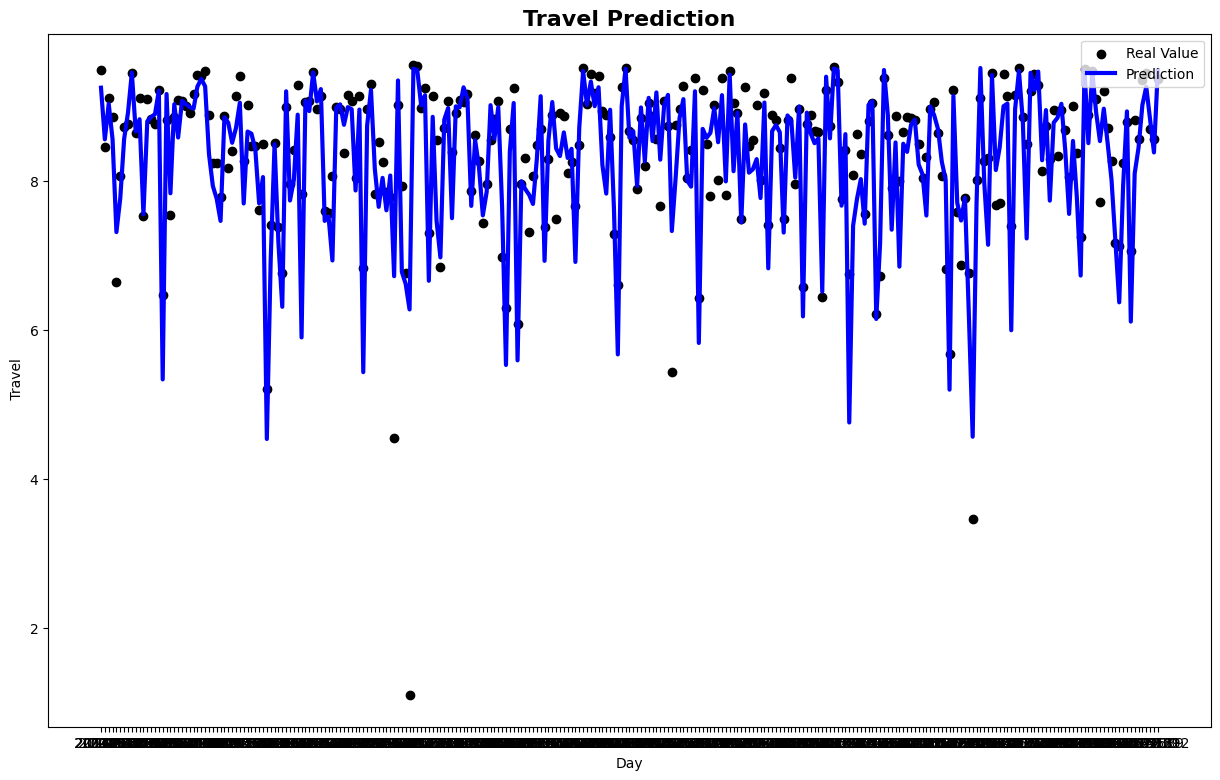

In [34]:
# Lasso Regression with Polynomial Terms

# create polynomial terms
train_poly, test_poly = bs_create_polynomial_terms(X_train, X_test, 2)

# Lasso regularization requires scaled data
train_scaled, test_scaled = bs_scale_mean_std(train_poly, test_poly)

# Create linear regression object
model6 = linear_model.LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0])

# get fitted regresser
model6 = bs_fit_and_save(model6, train_scaled, y_train, test_scaled, "output_lasso_poly_2", "Model 6: LassoRegressionPolynomial")


y_pred  = model6.predict(test_scaled)
plt.scatter(x_plot['date2'], np.log(y_test),  color='black', label="Real Value")
plt.plot(x_plot['date2'], y_pred, color='blue', linewidth=3,  label="Prediction")
plt.rcParams["figure.figsize"] = (15,9)
plt.legend(loc='upper right')
plt.title("Travel Prediction", fontsize=16, fontweight='bold')
plt.xlabel("Day")
plt.ylabel(" Travel")
plt.show()

### Model 7 - SVR with Polynomial Terms

#### In the Support Vector Regression (SVR) with Polynomial Terms model, polynomial features of degree 2 are created to capture non-linear relationships between the input features and the target variable. As SVR models are sensitive to the scaling of data, the training and test sets are scaled using the bs_scale_mean_std function.

Mean Squared Error: 0.43
Variance score: 0.67


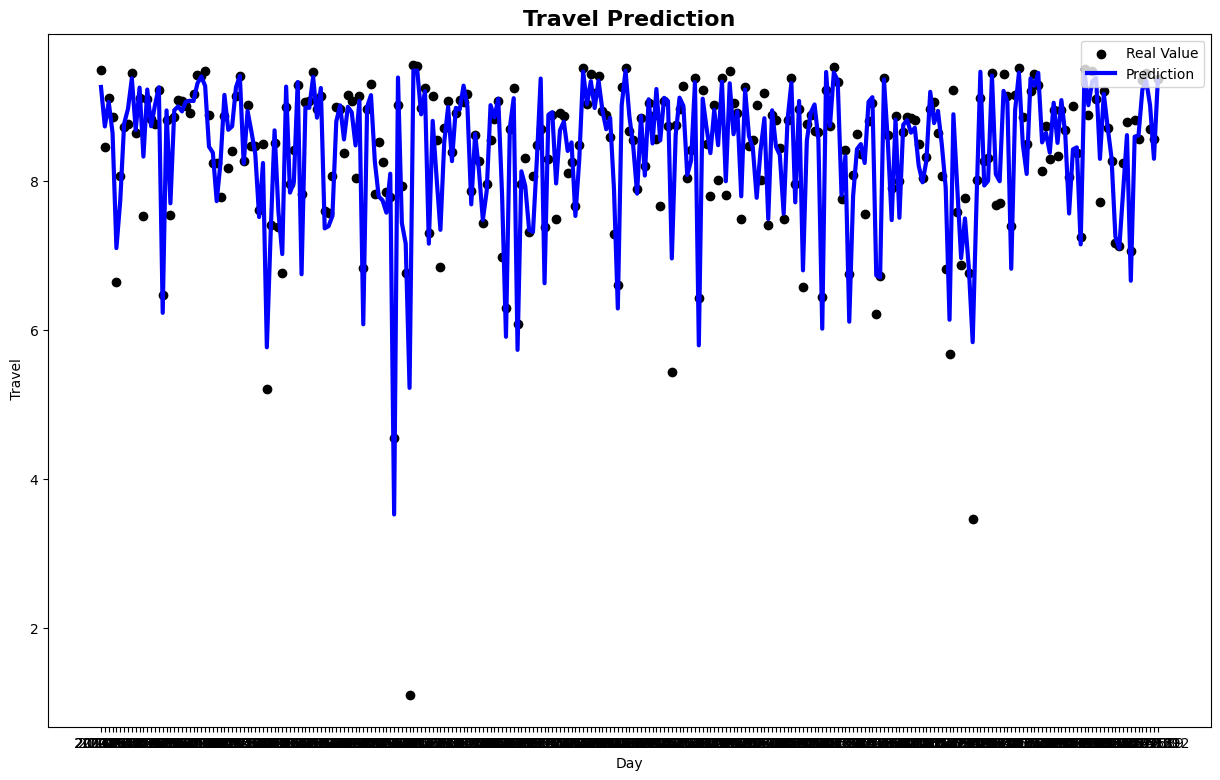

In [35]:
# Support Vector Regression with Polynomial Terms

# create polynomial terms
train_poly, test_poly = bs_create_polynomial_terms(X_train, X_test, 2)

# SVR requires scaled data
train_scaled, test_scaled = bs_scale_mean_std(train_poly, test_poly)

# Create linear regression object
# ideally these parameters should be determined using cross-validation
model7 = svm.SVR(kernel='rbf', C=100, gamma=0.01) 

# get fitted regresser
model7 = bs_fit_and_save(model7, train_scaled, y_train, test_scaled, "output_svm_poly_2", "Model 7: SupportVectorRegressionPolynomial")

y_pred  = model7.predict(test_scaled)
plt.scatter(x_plot['date2'], np.log(y_test),  color='black', label="Real Value")
plt.plot(x_plot['date2'], y_pred, color='blue', linewidth=3,  label="Prediction")
plt.rcParams["figure.figsize"] = (15,9)
plt.legend(loc='upper right')
plt.title("Travel Prediction", fontsize=16, fontweight='bold')
plt.xlabel("Day")
plt.ylabel(" Travel")
plt.show()

### MODEL 8 - Gradient Boost with Polynomial Terms

#### In the Gradient Boosting Regression with Polynomial Terms model, polynomial features of degree 2 are first created to capture more complex relationships between the input features and the target variable. Then, the data is scaled using the bs_scale_mean_std function to ensure that the Gradient Boosting model performs optimally, as it can be sensitive to the scale of the features. The Gradient Boosting Regressor (GBR) is a powerful ensemble learning technique that builds an additive model of weak learners (typically decision trees) in a sequential manner.

Mean Squared Error: 0.03
Variance score: 0.98


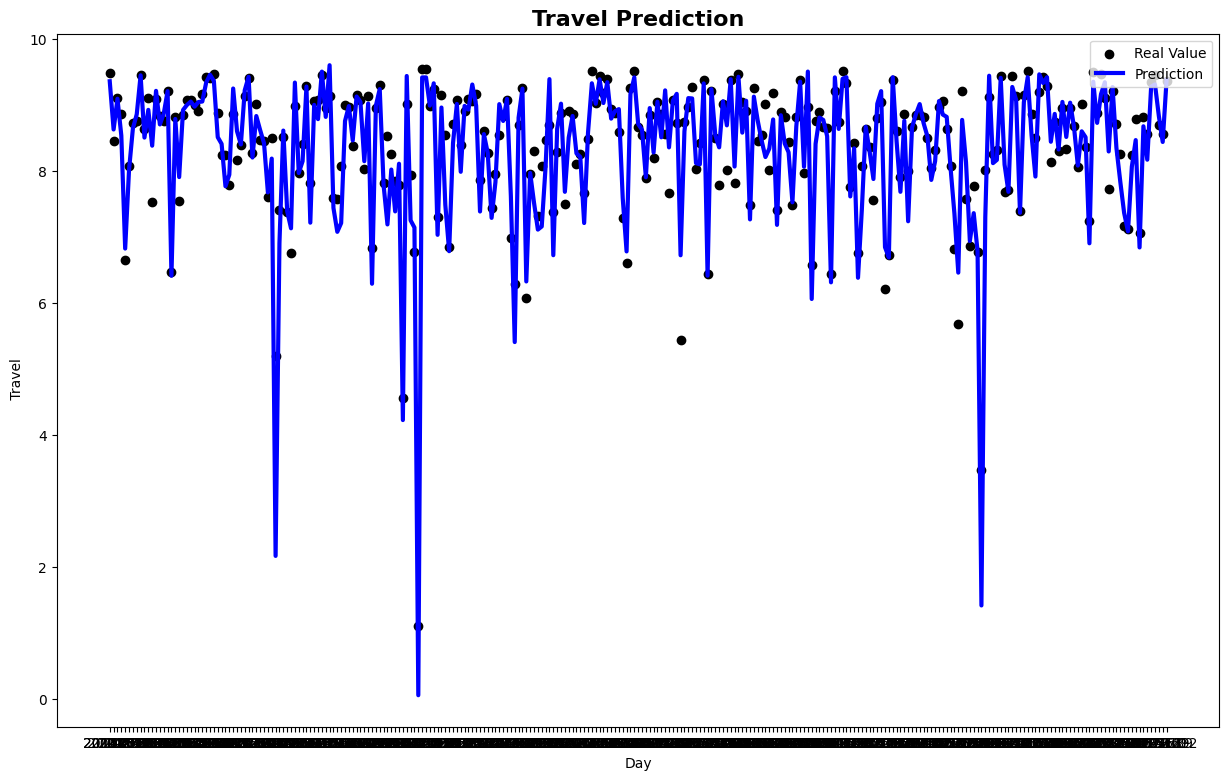

In [36]:
# Gradient Boosting Regression with Polynomial Terms

# create polynomial terms
train_poly, test_poly = bs_create_polynomial_terms(X_train, X_test, 2)

# Unlike simple linear regression, ridge regularization requires scaled data
train_scaled, test_scaled = bs_scale_mean_std(train_poly, test_poly)

# Create linear regression object
model8 = GradientBoostingRegressor(n_estimators=350, learning_rate=0.1, max_depth=3, loss='squared_error')

# get fitted regresser
model8 = bs_fit_and_save(model8, train_scaled, y_train, test_scaled, "output_gbm_poly_2", "Model 8: GradientBoostPolynomial")


y_pred  = model8.predict(test_scaled)
plt.scatter(x_plot['date2'], np.log(y_test),  color='black', label="Real Value")
plt.plot(x_plot['date2'], y_pred, color='blue', linewidth=3,  label="Prediction")
plt.rcParams["figure.figsize"] = (15,9)
plt.legend(loc='upper right')
plt.title("Travel Prediction", fontsize=16, fontweight='bold')
plt.xlabel("Day")
plt.ylabel(" Travel")
plt.show()

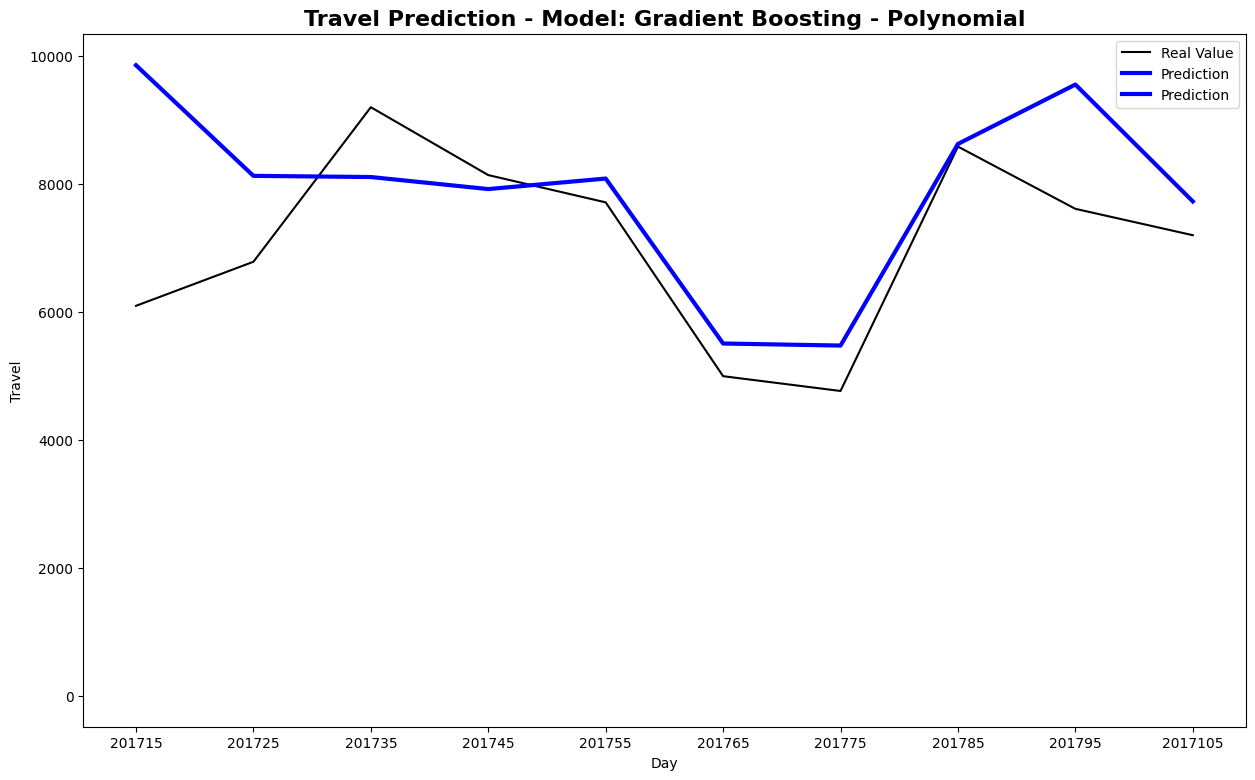

In [37]:
#Validation 
# create polynomial terms
train_poly, valid_poly = bs_create_polynomial_terms(X_train, X_valida, 2)
# Unlike simple linear regression, ridge regularization requires scaled data
train_scaled, valid_scaled = bs_scale_mean_std(train_poly, valid_poly)

plot_chart_predict(x_plot2, bot=120,top=130,model=model8,x_test=valid_scaled,y_test=y_valida,desc="Gradient Boosting - Polynomial")

### MODEL 9 - Gradient Boost with Cross-Validation

#### Gradient Boosting Regression (GBR) model is enhanced by performing parameter estimation using cross-validation. This approach is crucial for tuning the hyperparameters of the model to improve its performance.

In [38]:
# GBR with parameter estimation with cross-validation

# create polynomial terms
train_poly, test_poly = bs_create_polynomial_terms(X_train, X_test, 3)

# Unlike simple linear regression, ridge regularization requires scaled data
train_scaled, test_scaled = bs_scale_mean_std(train_poly, test_poly)


# create polynomial terms
train2_poly, valid_poly = bs_create_polynomial_terms(X_train, X_valida, 3)

# Unlike simple linear regression, ridge regularization requires scaled data
train2_scaled, valid_poly = bs_scale_mean_std(train2_poly, valid_poly)


# Create linear regression object
model9 = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, 
                                max_depth=3, loss='squared_error')
                                
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
param_range_n_estimators = [500, 1000, 2000]
param_range_max_depth = [1, 3, 5]

param_grid = [{'n_estimators': param_range_n_estimators,
              'max_depth': param_range_max_depth}]

# we will not define optional 'scoring' parameter. It will use lsr for scoring
# read here for detail of scoring for classification and regression grid search
# http://scikit-learn.org/stable/modules/grid_search.html
# https://github.com/scikit-learn/scikit-learn/blob/51a765a/sklearn/metrics/regression.py#L370
model10 = GridSearchCV(estimator=model9, param_grid=param_grid, cv=5, n_jobs=4)
                 
# get fitted regresser
model10 = bs_fit_and_save(model10, train_scaled, y_train, test_scaled, "output_gbm_cv_poly_3", "Model (9)10: GBR_CrossValidation") # this will take some time

Mean Squared Error: 0.00
Variance score: 1.00


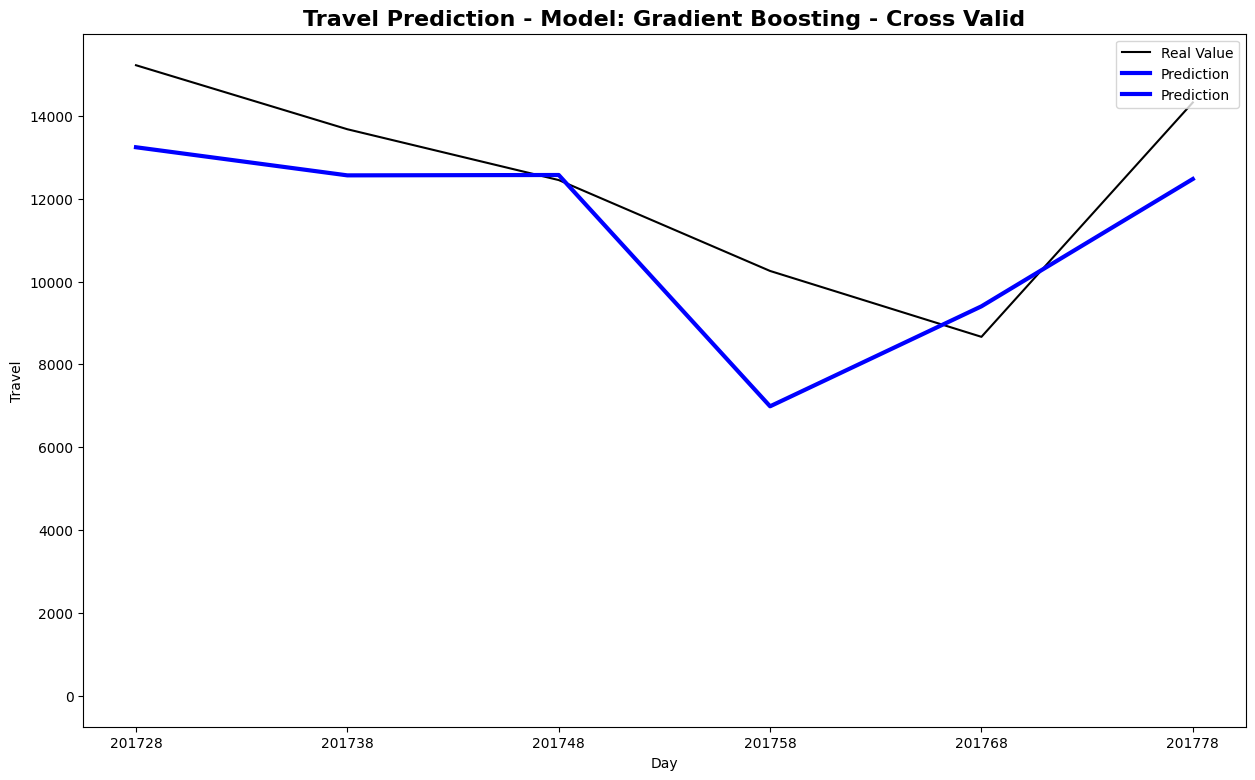

In [39]:
plot_chart_predict(x__plot=x_plot2, bot=213,top=219,model=model10,x_test=valid_poly,y_test=y_valida,desc="Gradient Boosting - Cross Valid")

In [40]:
print("\nModel Comparison:")
results_df = pd.DataFrame(model_results)
results_df


Model Comparison:


,Model,MSE,Variance Score
0,Model 1: Simple LinearRegression,0.941106,0.281158
1,Model 2: LinearRigression_Ridge,0.941829,0.280606
2,Model 3: LinearRegression_Lasso,0.941477,0.280875
3,Model 4: LinearRegressionPolynomialTerms,0.513145,0.608046
4,Model 5: RidgeRegressionPolynomial,0.519766,0.602989
5,Model 6: LassoRegressionPolynomial,0.519506,0.603188
6,Model 7: SupportVectorRegressionPolynomial,0.427497,0.673466
7,Model 8: GradientBoostPolynomial,0.027499,0.978996
8,Model (9)10: GBR_CrossValidation,0.000463,0.999647


## Key Insights

1. Linear Models (Simple, Ridge, Lasso): 
    * Models like Simple Linear Regression, Ridge Regression, and Lasso Regression perform similarly in terms of MSE and variance score, indicating that regularization doesn't significantly improve their performance. They show relatively high MSE (around 0.94) and low variance scores.

2. Polynomial Models (Models 4, 5, 6):

    * Linear Regression with Polynomial Terms (Model 4) performs better than simple linear models, with an MSE of 0.51 and a variance score of 0.6, showing that the polynomial terms help capture non-linear relationships.
    * Ridge and Lasso Regression with Polynomial Terms (Models 5 and 6) also improve over their non-polynomial counterparts, but the performance improvement is minimal compared to Model 4.
    
3. Support Vector Regression (Model 7):

    * Support Vector Regression with Polynomial Terms achieves MSE = 0.42 and a variance score of 0.67, showing that it captures complex relationships better than the linear models and polynomial linear models. SVR performs quite well, but there is still room for improvement compared to gradient boosting.
    
4. Gradient Boosting Models (Models 8 and 9):

    * Gradient Boosting Regression with Polynomial Terms (Model 8) significantly outperforms the other models, with a MSE = 0.02 and a variance score of about 0.98, suggesting that it effectively captures complex relationships in the data.
    * Gradient Boosting with Cross-Validation (Model 9) further improves this result, achieving an MSE of about 0.0004 and an extremely high variance score of 0.99. This indicates that cross-validation optimization has led to an excellent model with minimal error and high prediction accuracy.

## CONCLUSION

### **<u>GBR with Cross-Validation</u>**, is the <u>best performing model</u> by far, both in terms of MSE and Variance Score. This model is likely to generalize well to new data and should be considered as the final model for deployment or further testing.**

### **<u>GBR with Polynomial Terms</u>** is also a very strong contender, offering excellent performance, though Model 9 seems to have fine-tuned parameters for optimal results.**